<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Proyecto Final - Exploratory Data Analysis (EDA)**
Yachay Tolosa Bello – 202315750

Kevin Infante Hernández – 201117324

John Vicente Moreno Triviño – 202210162

MINE-4101: Applied Data Science  

Universidad de los Andes  
  
**Dataset:** Dataset unificado de siniestros viales en Bogotá, 2015 - 2022.  [[dataset](https://datosabiertos.bogota.gov.co/dataset/siniestros-viales-consolidados-bogota-d-c)]

**Business Context:**

• Priorización de al menos 2 acciones de política pública, que según la evaluación hecha, demuestren ser las más convenientes y de mayor impacto.

• Formular un grupo de acciones de política pública que, en su conjunto, permitan disminuir al menos un 10% de los accidentes con fatalidades y/o heridos en Bogotá, en el corto plazo (menos de 12 meses).

Última modificación: septiembre, 2023

In [23]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
from scipy.stats import chi2_contingency

In [24]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Loading the data**

In [25]:
# Loading the CSV file as dataframe
siniestros_df = pd.read_csv("./dataset_preparado.csv")

<ipython-input-25-39c71cc6e9e4>:2: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  siniestros_df = pd.read_csv("./dataset_preparado.csv")


In [26]:
# Showing dataframe dimensions
siniestros_df.shape

(745256, 28)

In [9]:
# Showing column types
siniestros_df.dtypes

X                        object
Y                       float64
FORMULARIO               object
FECHA_OCURRENCIA_ACC     object
HORA_OCURRENCIA_ACC      object
ANO_OCURRENCIA_ACC      float64
MES_OCURRENCIA_ACC       object
DIA_OCURRENCIA_ACC       object
DIRECCION                object
GRAVEDAD                 object
CLASE_ACC                object
LOCALIDAD                object
NOMBRE_causa             object
TIPO_CAUSA_causa         object
GEOMETRICA_A_via         object
GEOMETRICA_B_via         object
GEOMETRICA_C_via         object
UTILIZACION_via          object
CALZADAS_via             object
CARRILES_via             object
MATERIAL_via             object
ESTADO_via               object
CONDICIONES_via          object
ILUMINACION_A_via        object
AGENTE_TRANSITO_via      object
SEMAFORO_via             object
CLASE_vehiculo           object
SERVICIO_vehiculo        object
dtype: object

In [8]:
siniestros_df.sample(10) # Showing a sample of n rows

X         Y  \
575149                                  -74.1633411989999  4.568637   
583126                                      -74.085142006  4.588810   
649925                                      -74.141845108  4.582350   
427194                                      -74.120790375  4.602660   
68089                                       -74.048864744  4.738826   
261164  -74.1115000789999,4.51237684500006,A000600957,...       NaN   
205525                                      -74.077456131  4.675751   
127089                                      -74.122978765  4.641130   
556897                                           -74.1138  4.549000   
23396   -74.126581906,4.64923277500003,A000405950,2016...       NaN   

        FORMULARIO    FECHA_OCURRENCIA_ACC HORA_OCURRENCIA_ACC  \
575149  A001298762  2021/05/08 00:00:00+00         17:00-18:00   
583126  A001340949  2021/09/04 00:00:00+00         12:00-13:00   
649925  A001297270  2021/04/07 00:00:00+00         06:00-07:00   
427194  A001032917  2019/08/11 00:00:00+00         14:00-15:00   
68089   A000757593  2018/01/30 00:00:00+00         22:00-23:00   
261164         NaN                     NaN                 NaN   
205525  A000555809  2017/02/16 00:00:00+00         10:00-11:00   
127089  A000647685  2017/08/10 00:00:00+00         16:00-17:00   
556897  A000687824  2017/10/15 00:00:00+00         04:00-05:00   
23396          NaN                     NaN                 NaN   

        ANO_OCURRENCIA_ACC MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC  \
575149              2021.0               MAYO             SABADO   
583126              2021.0         SEPTIEMBRE             SABADO   
649925              2021.0              ABRIL          MIERCOLES   
427194              2019.0             AGOSTO            DOMINGO   
68089               2018.0              ENERO             MARTES   
261164                 NaN                NaN                NaN   
205525              2017.0            FEBRERO             JUEVES   
127089              2017.0             AGOSTO             JUEVES   
556897              2017.0            OCTUBRE            DOMINGO   
23396                  NaN                NaN                NaN   

                                  DIRECCION     GRAVEDAD CLASE_ACC  \
575149                   KR 43 - CL 73 S 02  CON HERIDOS    CHOQUE   
583126                  KR 10  - CL 1  S 02  CON HERIDOS      OTRO   
649925                  CL 55 A S- KR 33 02  CON HERIDOS    CHOQUE   
427194  AV AVENIDA PRIMERA DE MAYO-KR 50 02   SOLO DANOS    CHOQUE   
68089                       KR 45-CL 153 02  CON HERIDOS    CHOQUE   
261164                                  NaN          NaN       NaN   
205525                       KR 60-CL 76 02   SOLO DANOS    CHOQUE   
127089                      CL 13-KR 68D 07   SOLO DANOS    CHOQUE   
556897                      KR 5D-CL 49A 02   SOLO DANOS    CHOQUE   
23396                                   NaN          NaN       NaN   

                 LOCALIDAD                        NOMBRE_causa  \
575149      CIUDAD BOLIVAR                 DESOBEDECER SEÑALES   
583126       SAN CRISTOBAL                                OTRA   
649925          TUNJUELITO                 DESOBEDECER SEÑALES   
427194       PUENTE ARANDA  NO MANTENER DISTANCIA DE SEGURIDAD   
68089                 SUBA                  ADELANTAR CERRANDO   
261164                 NaN                                 NaN   
205525      BARRIOS UNIDOS                 DESOBEDECER SEÑALES   
127089            FONTIBON                  ADELANTAR CERRANDO   
556897  RAFAEL URIBE URIBE                 DESOBEDECER SEÑALES   
23396                  NaN                                 NaN   

       TIPO_CAUSA_causa GEOMETRICA_A_via GEOMETRICA_B_via GEOMETRICA_C_via  \
575149        CONDUCTOR              NaN              NaN              NaN   
583126             OTRO              NaN              NaN              NaN   
649925        CONDUCTOR              NaN              NaN         

# **2. Univariate analysis**

# **Tamaño de los datos**

In [14]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
siniestros_df["FORMULARIO"].nunique()

232603

# **Localidades con más accidentes**

Se observa que las localidades con más accidentes están ubicadas al occidente de la ciudad: Kennedy, Engativa y Suba.

In [19]:
siniestros_df["LOCALIDAD"].unique()

array(['ENGATIVA', 'SUBA', nan, 'CIUDAD BOLIVAR', 'LOS MARTIRES',
       'FONTIBON', 'USAQUEN', 'KENNEDY', 'TEUSAQUILLO', 'CHAPINERO',
       'TUNJUELITO', 'BOSA', 'PUENTE ARANDA', 'RAFAEL URIBE URIBE',
       'BARRIOS UNIDOS', 'SANTA FE', 'SAN CRISTOBAL', 'ANTONIO NARINO',
       'USME', 'CANDELARIA', 'SUMAPAZ'], dtype=object)

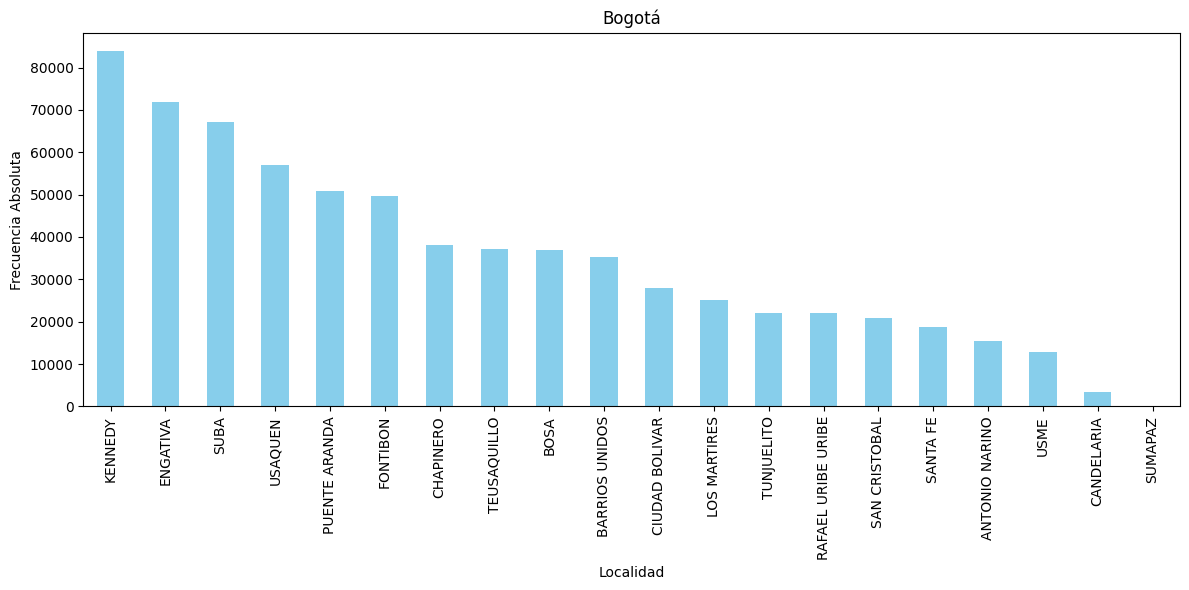

In [20]:
frequencies = siniestros_df['LOCALIDAD'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Localidad')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Tipo de causa del accidente**

Si se consideran todos los tipos de accidente, sin filtrar por su gravedad, vemos que la causa más común es una mala práctica del conductor.

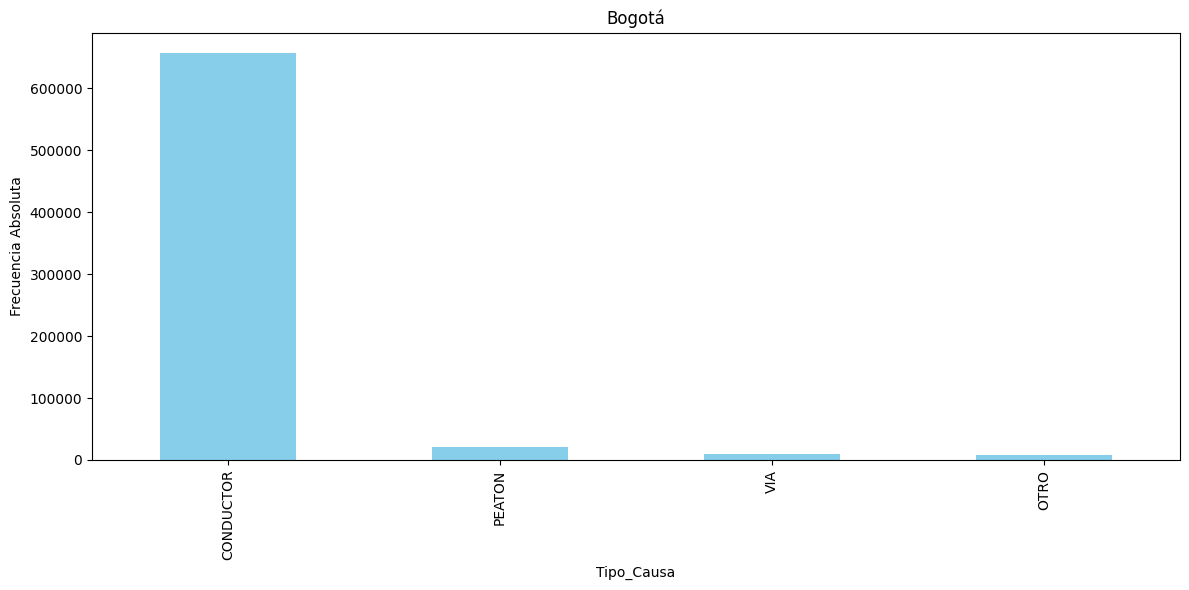

In [30]:
frequencies = siniestros_df['TIPO_CAUSA_causa'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo_Causa')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Accidentes por gravedad**

En general, los accidentes con muertos son una gran minoría respecto al total. Pero son precisamente estos accidentes los que más impacto causan sobre la sociedad.

Por otra parte, la porción de accidentes con heridos no es nada despreciable, siendo un 43.5% del total. Lo cual genera una alerta de alto nivel.

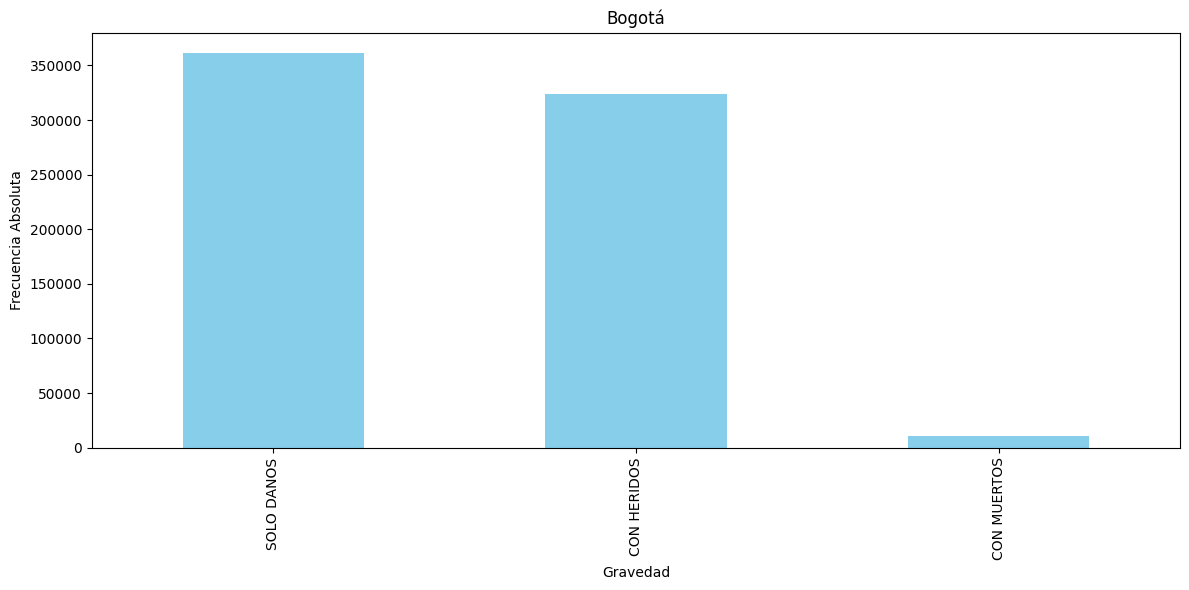

In [31]:
frequencies = siniestros_df['GRAVEDAD'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [29]:
siniestros_df["GRAVEDAD"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

SOLO DANOS     0.485357
CON HERIDOS    0.435104
NaN            0.065108
CON MUERTOS    0.014431
Name: GRAVEDAD, dtype: float64

# **Meses con más accidentes**

A priori, no existe una gran diferencia entre el número de accidentes de cada mes. Sin embargo, se observa una ligera disminución en los meses de junio, enero y febrero. En el caso de febrero, esto se debe a que solo tiene 28 días. En el caso de enero y julio se podría deber a que por la temporada de vacaciones disminuye el número de carros circulando dentro de Bogotá, y por ende, disminuyen los accidentes en la ciudad.

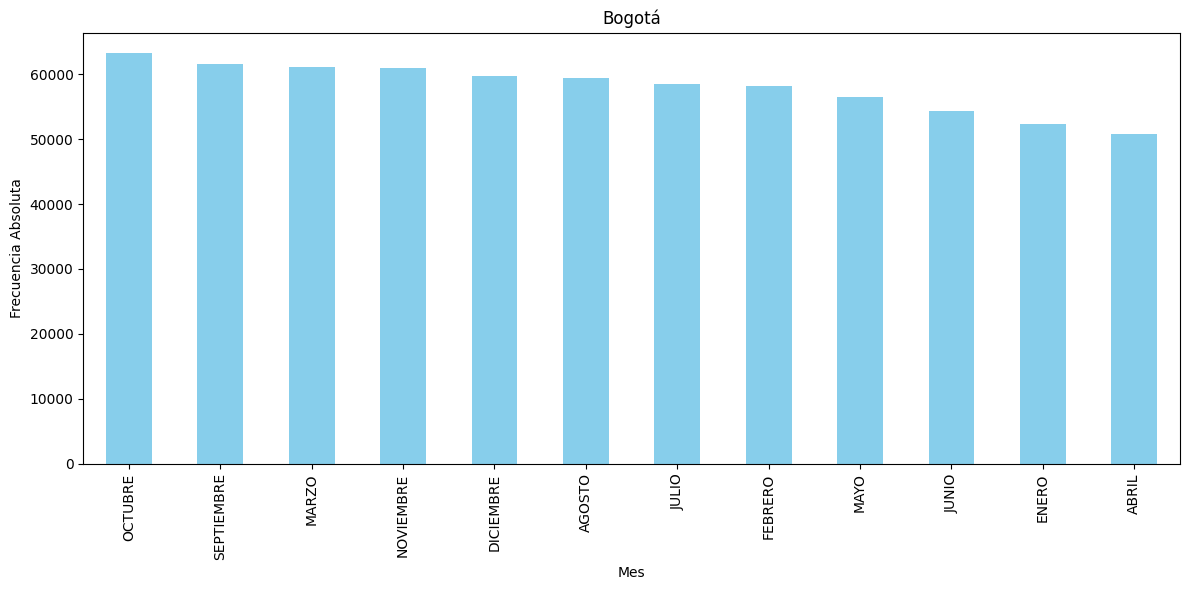

In [60]:
frequencies = siniestros_df['MES_OCURRENCIA_ACC'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Días con más accidentes**

Existe una ligera tendencia a tener más accidentes los viernes y sábados, lo cual concuerda con el hecho de que son los días en que se consume más alcohol.

Por otra parte, se evidencia los domingos los accidentes disminuyen, lo cual puede explicarse porque ese día de la semana circulan menos carros (la gente descansa en casa).

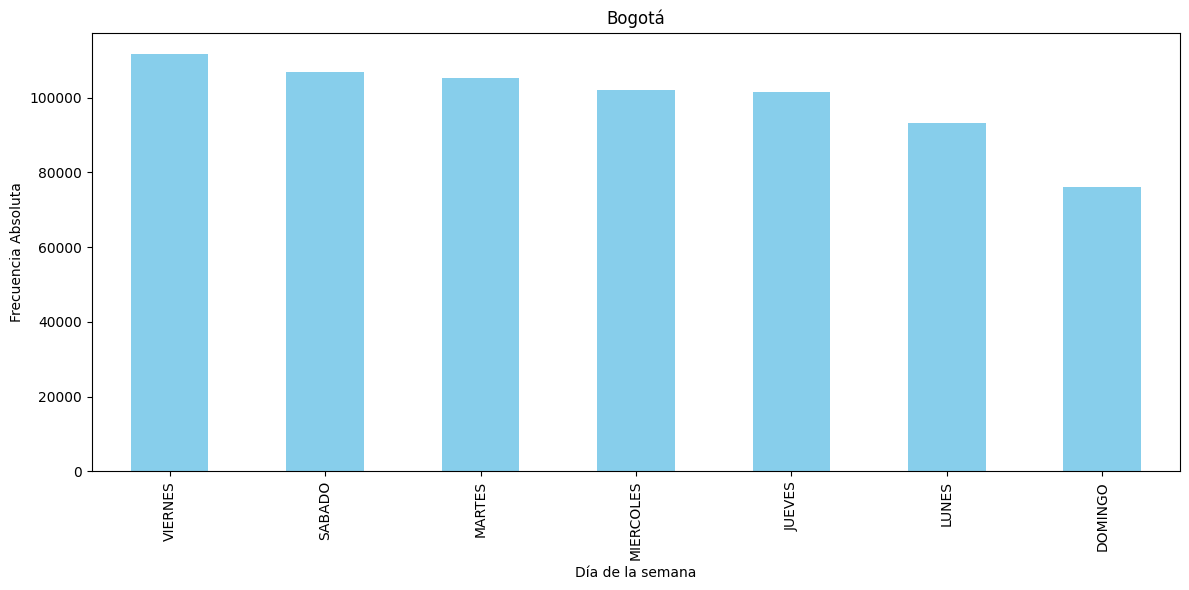

In [33]:
frequencies = siniestros_df['DIA_OCURRENCIA_ACC'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Horas con más accidentes**

Si no se filtran los accidentes según su gravedad, es posible ver que la mayor cantidad ocurre entre las 06:00 y las 21:00. Esto se da simplemente porque es a estas horas que hay más circulación de carros en Bogotá, y por ende, hay más probabilidad de accidentes.

Sin embargo, si solo se consideraran los accidentes con heridos, esta distribución temporal cambiará, tal como se verá más adelante en el análisis bivariado.

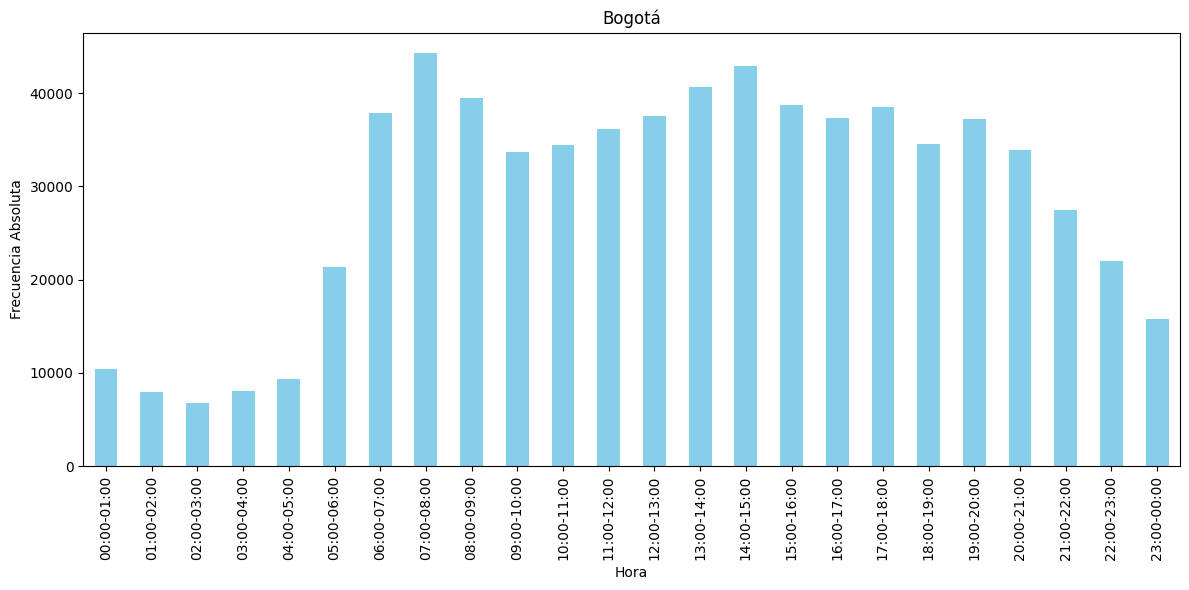

In [46]:
frequencies = siniestros_df['HORA_OCURRENCIA_ACC'].value_counts()
frequencies = frequencies.sort_index()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Hora')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Clase del accidente**

En general, la gran mayoría de los accidentes son del tipo choque entre dos vehículos. Además, existe una pequeña participación, pero de impacto nada despreciable, de atropellamientos a peatones y ciclistas.

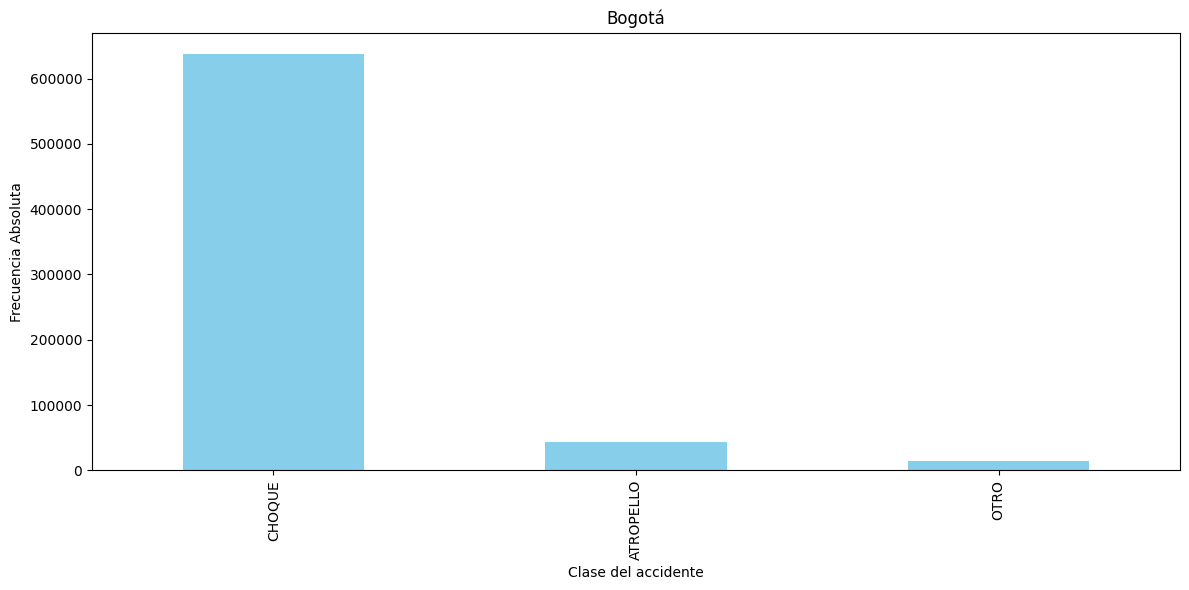

In [50]:
frequencies = siniestros_df['CLASE_ACC'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Clase del accidente')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Tipo de vehículos involucrados**

Si no se tiene en cuenta la gravedad del accidente, son los vehículos particulares los que generan más siniestros, seguidos de las motocicletas. Sin embargo, cuando se tenga en cuenta la gravedad, esta perspectiva cambiará.

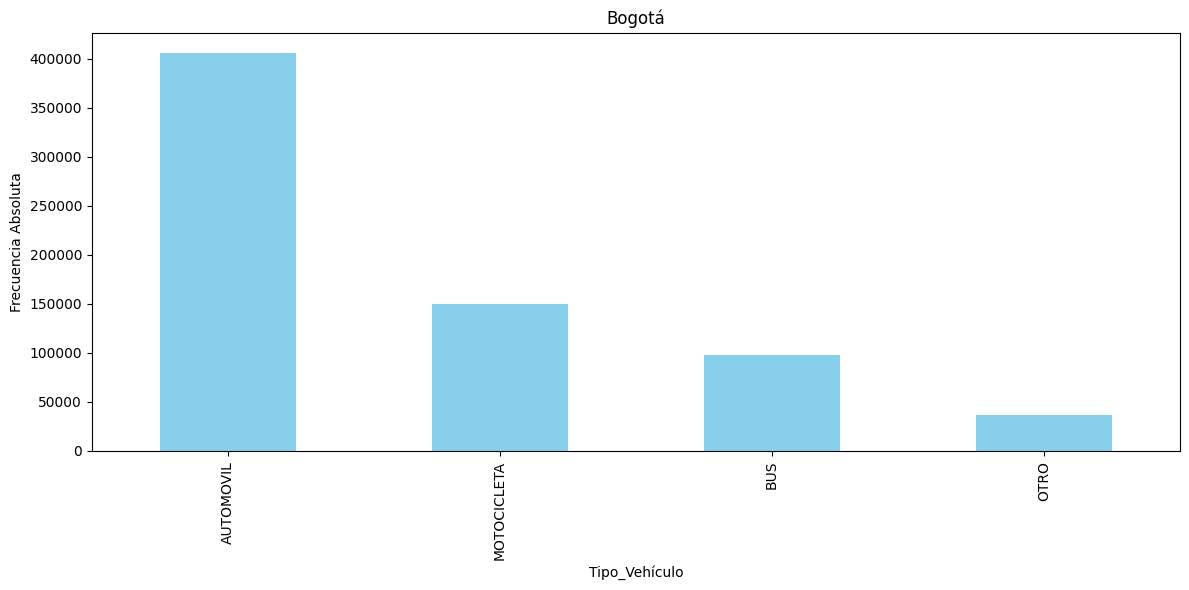

In [51]:
frequencies = siniestros_df['CLASE_vehiculo'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo_Vehículo')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **2. Bivariate analysis**

Dado que la mayor parte de las **variables** de interés, de momento, son **categóricas**, se utilizará una **tabla de contingencia cruzada** para extraer insgiths del análisis bivariado.

Cuando se comience a desarrollar el modelo de regresión, estas variables deberán ser codificadas como variables númericas, bien sea mediante un one hot encoder o una codificación ordinal.

Por otra parte, se ha decidido utilizar una prueba del tipo **chi-cuadrado**, la cual es útil para paras de variables categóricas, en las que una de las variables es de tipo ordinal. En este caso, la variable más relevante es la gravedad de los accidentes, la cual se clasifica en orden creciente como: solo daños, con heridos, y con muertos.

# **Gravedad vs. Tipo de vehículo**

Al comparar la gravedad de los accidentes contra el tipo de vehículo involucrado, es posible ver que los accidentes con solo daños comienzan a tomar preminencia cuando los vehículos son automoviles o buses. De todas formas, no es nada despreciable el componente de accidentes con heridos en estos tipos de vehículos.

Sin embargo, lo más destacable es que en el caso de las motocicletas los accidentes con heridos son la norma y es posible concluir que en la gran mayoría de accidentes en motocicleta suele haber heridos.

Además, al efectuar la prueba chi-cuadrado, es posible observar que efectivamente existe correlación entre el tipo de vehículo y la gravedad de los accidentes.

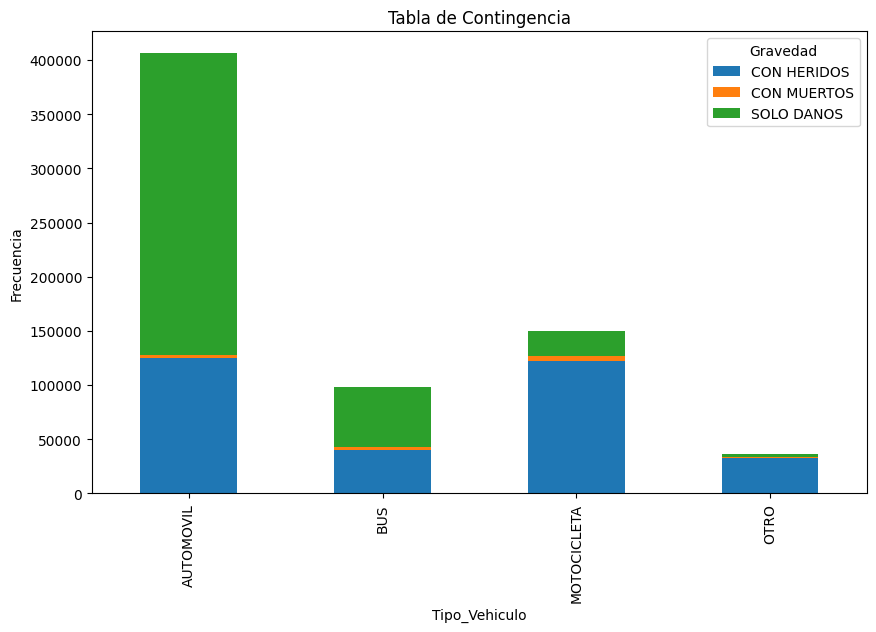

In [74]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(siniestros_df['CLASE_vehiculo'], siniestros_df['GRAVEDAD'])
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tabla de Contingencia')
plt.xlabel('Tipo_Vehiculo')
plt.ylabel('Frecuencia')
plt.legend(title='Gravedad')
plt.xticks(rotation=90)
plt.show()

In [78]:
# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Estadística de Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:")
print(expected)

Estadística de Chi-cuadrado: 68379.2648793901
Valor p: 0.0
Grados de libertad: 4
Tabla de frecuencias esperadas:
[[2.02861052e+04 6.72837754e+02 2.26290570e+04]
 [2.96984708e+05 9.85021629e+03 3.31285076e+05]
 [6.99318659e+03 2.31945951e+02 7.80086746e+03]]


# **Gravedad vs. Clase de accidente**

Esta comparación permite observar que en el caso de los choques, la distribución de gravedad no varía respecto al promedio de la muestra total. Sin embargo, lo que sí es cierto es que los atropellamientos generan accidentes más severos, tal como es de esperarse.

Además, al efectuar la prueba chi-cuadrado, es posible observar que efectivamente existe correlación entre estas dos variables.

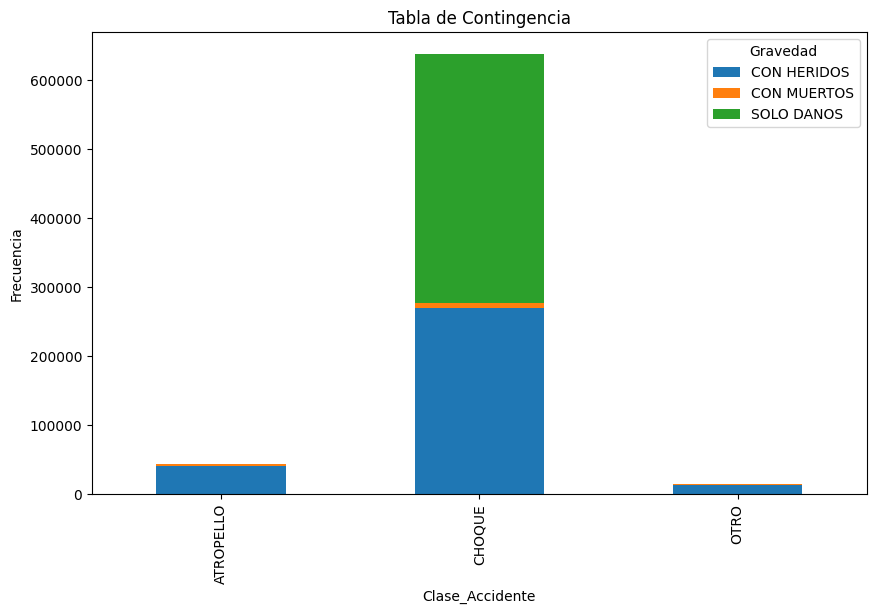

In [80]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(siniestros_df['CLASE_ACC'], siniestros_df['GRAVEDAD'])
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tabla de Contingencia')
plt.xlabel('Clase_Accidente')
plt.ylabel('Frecuencia')
plt.legend(title='Gravedad')
plt.xticks(rotation=90)
plt.show()

In [79]:
# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Estadística de Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:")
print(expected)

Estadística de Chi-cuadrado: 68379.2648793901
Valor p: 0.0
Grados de libertad: 4
Tabla de frecuencias esperadas:
[[2.02861052e+04 6.72837754e+02 2.26290570e+04]
 [2.96984708e+05 9.85021629e+03 3.31285076e+05]
 [6.99318659e+03 2.31945951e+02 7.80086746e+03]]


# **Gravedad vs. Día de ocurrencia:**

Mientras el número de accidentes sí puede verse afectado por el día de la semana, el análisis muestra que la distribución en la gravedad de los accidentes no depende del día en que ocurren. La prueba chi-cuadrado muestra que efectivamente no hay relación entre estas dos variables.

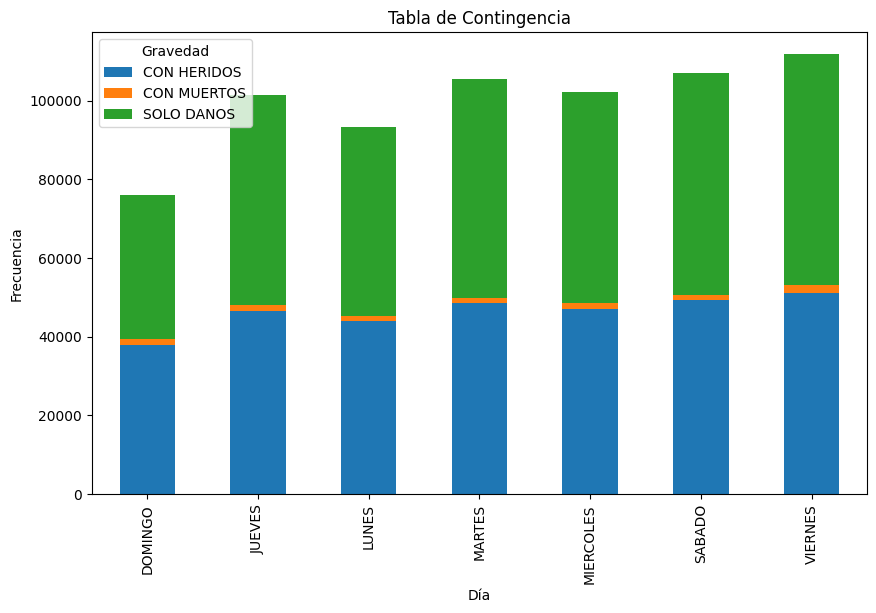

In [82]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(siniestros_df['DIA_OCURRENCIA_ACC'], siniestros_df['GRAVEDAD'])
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tabla de Contingencia')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.legend(title='Gravedad')
plt.xticks(rotation=90)
plt.show()

In [83]:
# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Estadística de Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:")
print(expected)

Estadística de Chi-cuadrado: 766.9790248493489
Valor p: 1.985599530421875e-156
Grados de libertad: 12
Tabla de frecuencias esperadas:
[[35360.13159685  1172.80430552 39444.06409763]
 [47199.1227068   1565.47308585 52650.40420734]
 [43387.91513547  1439.06516691 48399.01969762]
 [49033.75211774  1626.32300849 54696.92487377]
 [47523.97591046  1576.24762822 53012.77646132]
 [49747.21911088  1649.9868673  55492.79402182]
 [52011.88342179  1725.09993771 58019.0166405 ]]


# **Gravedad vs. Hora del accidente**

La tabla de contingencia permite deducir, tal vez, que los accidentes tienden a ser más graves en la madrugada y en la hora pico de la mañana.

Además, al efectuar la prueba chi-cuadrado, es posible observar que efectivamente existe correlación entre estas dos variables, aunque visualmente esta no es tan clara.

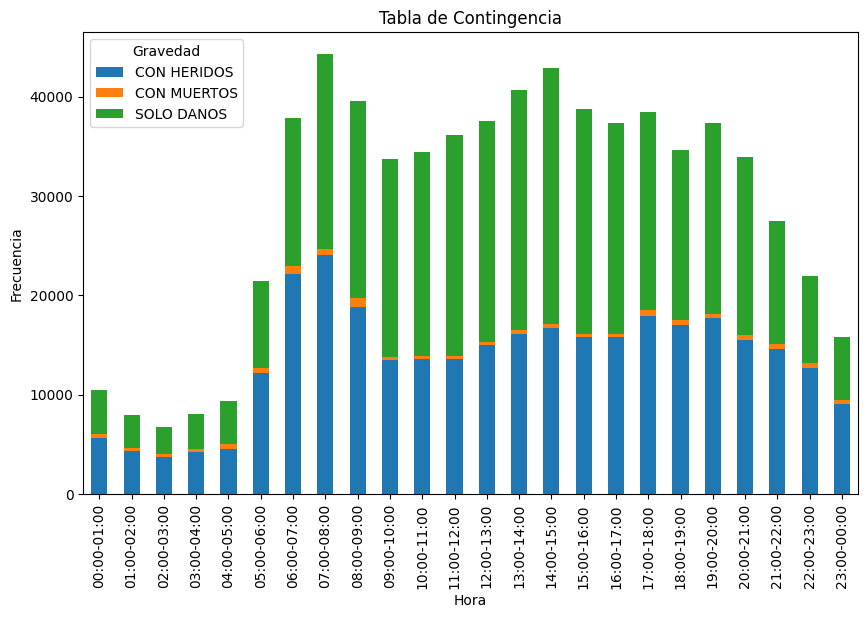

In [84]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(siniestros_df['HORA_OCURRENCIA_ACC'], siniestros_df['GRAVEDAD'])
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tabla de Contingencia')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.legend(title='Gravedad')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Estadística de Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:")
print(expected)

Estadística de Chi-cuadrado: 17499.61429829276
Valor p: 0.0
Grados de libertad: 46
Tabla de frecuencias esperadas:
[[ 4868.14399757   161.4637724   5430.39223003]
 [ 3681.35937101   122.10118926  4106.53943973]
 [ 3164.75900415   104.96688837  3530.27410748]
 [ 3769.78646083   125.03408761  4205.17945156]
 [ 4367.36742573   144.85430595  4871.77826832]
 [ 9962.47518278   330.42959006 11113.09522716]
 [17625.38062446   584.58838667 19661.03098887]
 [20602.1157113    683.31900697 22981.56528173]
 [18392.36927723   610.02742079 20516.60330198]
 [15697.2046606    520.6357663  17510.15957309]
 [16039.74328223   531.99688834 17892.25982943]
 [16809.05896368   557.513104   18750.42793232]
 [17489.01674384   580.06554869 19508.91770748]
 [18902.91936952   626.9610497  21086.11958079]
 [19970.09472195   662.35650191 22276.54877615]
 [18013.06360247   597.4468305  20093.48956704]
 [17385.69667047   576.63868851 19393.66464103]
 [17910.67434057   594.05084293 19979.2748165 ]
 [16099.78062216   53

# **Accidentes solo con muertos:**

Los accidentes con muertos son una minoría dentro de los datos existentes, pero sin duda son los que más impacto tienen en la sociedad. Por ello, vale la pena hacer una análisis bivariado que filtre los accidentes según su gravedad, concretamente solo los accidentes con muertos.

In [92]:
siniestros_muertos_df = siniestros_df[siniestros_df['GRAVEDAD'] == 'CON MUERTOS']

In [94]:
siniestros_muertos_df.shape

(10755, 28)

# **Accidentes con muertos vs. día de la semana**

En este caso, es notoria que los días viernes es cuando ocurren más accidentes con muertos. Sin embargo, se extraña que el día sábado no cumpla esta mismoa condición.

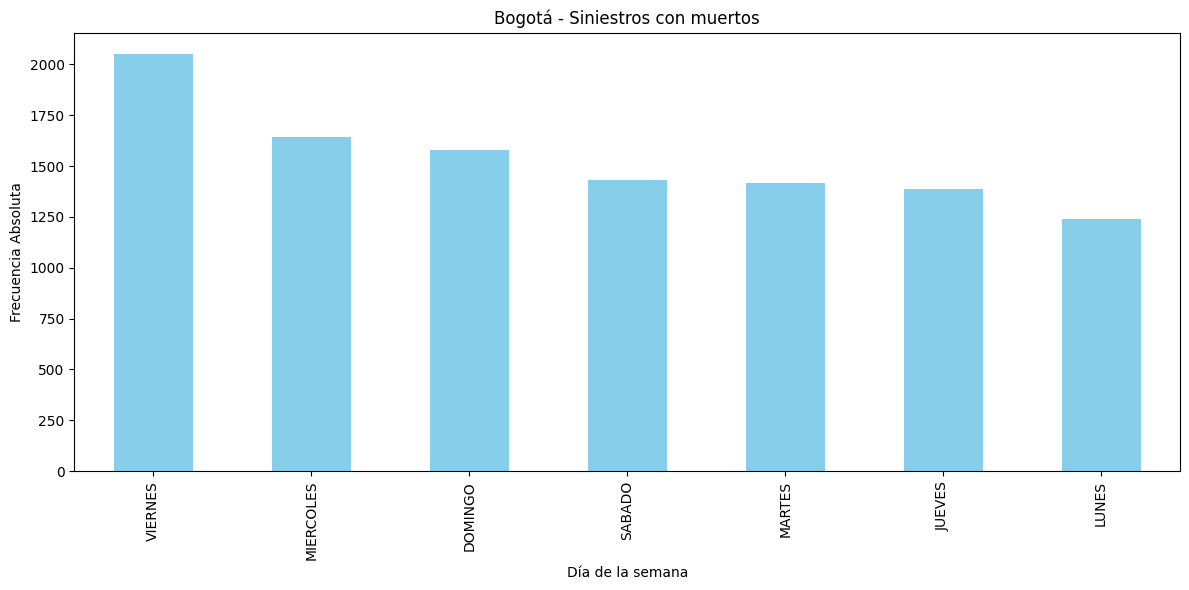

In [95]:
frequencies = siniestros_muertos_df['DIA_OCURRENCIA_ACC'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá - Siniestros con muertos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Accidentes con muertos vs. hora del día**

Tal como se había anticipado, los accidentes con muertos son más comunes a ciertas horas del día. Concretamente, de 04:00 a 06:00, en la hora pico AM y en la hora pico PM.

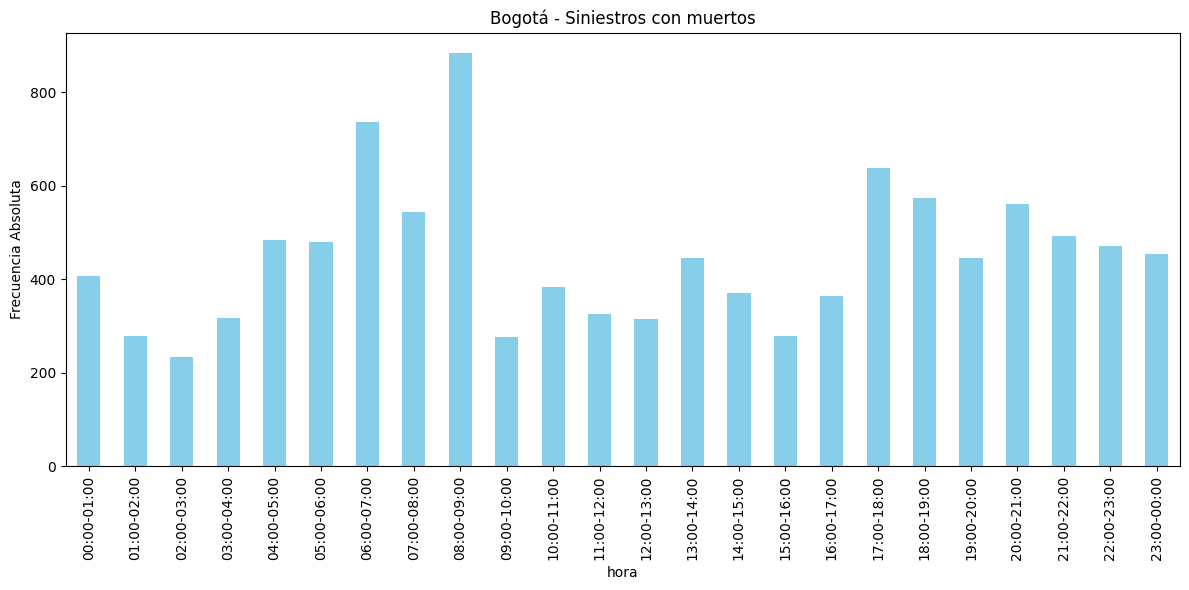

In [97]:
frequencies = siniestros_muertos_df['HORA_OCURRENCIA_ACC'].value_counts()
frequencies = frequencies.sort_index()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('hora')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá - Siniestros con muertos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Accidentes con muertos vs. tipo de vehículo**

Nuevamente, tal como se anticipó, al mirar solo los accidentes con muertos el panorama cambia. Es posible ver como las motocicletas se vuelven el vehículo con más predisposición a generar muertos. En segundo lugar, están los muertos en accidentes donde un carro particular se ve involucrado, pero lo cierto es que en estos casos la persona que fallece no suele ser el ocupante del carro, sino más bien un tercero: peatón, ciclista o motociclista.

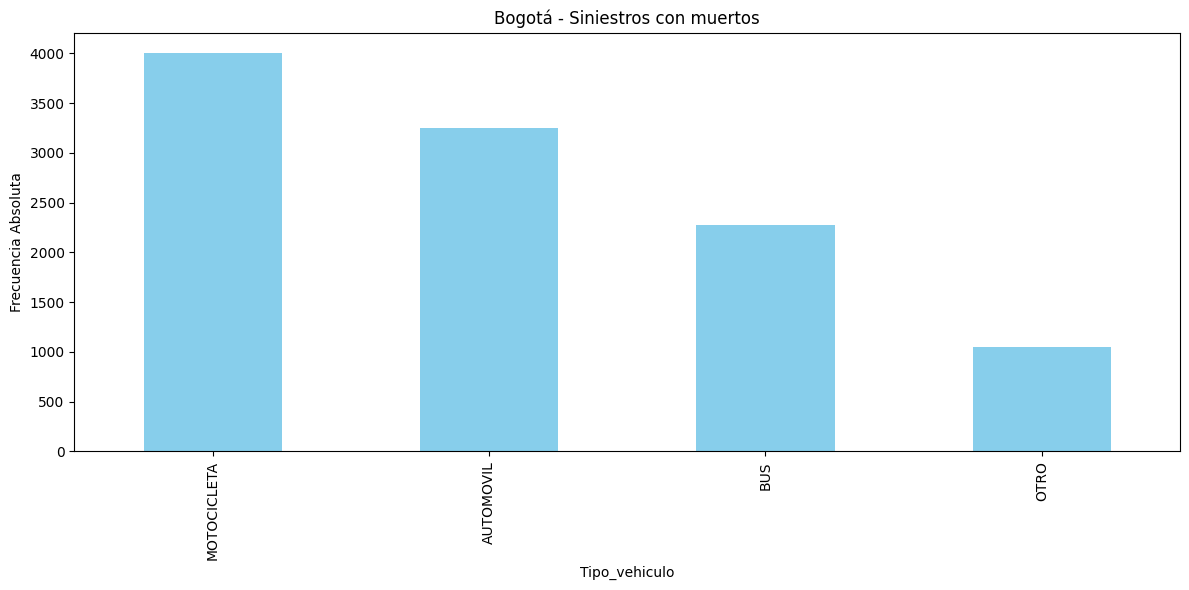

In [98]:
frequencies = siniestros_muertos_df['CLASE_vehiculo'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo_vehiculo')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá - Siniestros con muertos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Accidentes con muertos vs. tipo de causa**

En este caso, se mantiene el hecho de que la mayor parte de los accidentes con muertos son generados por malas prácticas de los conductores.

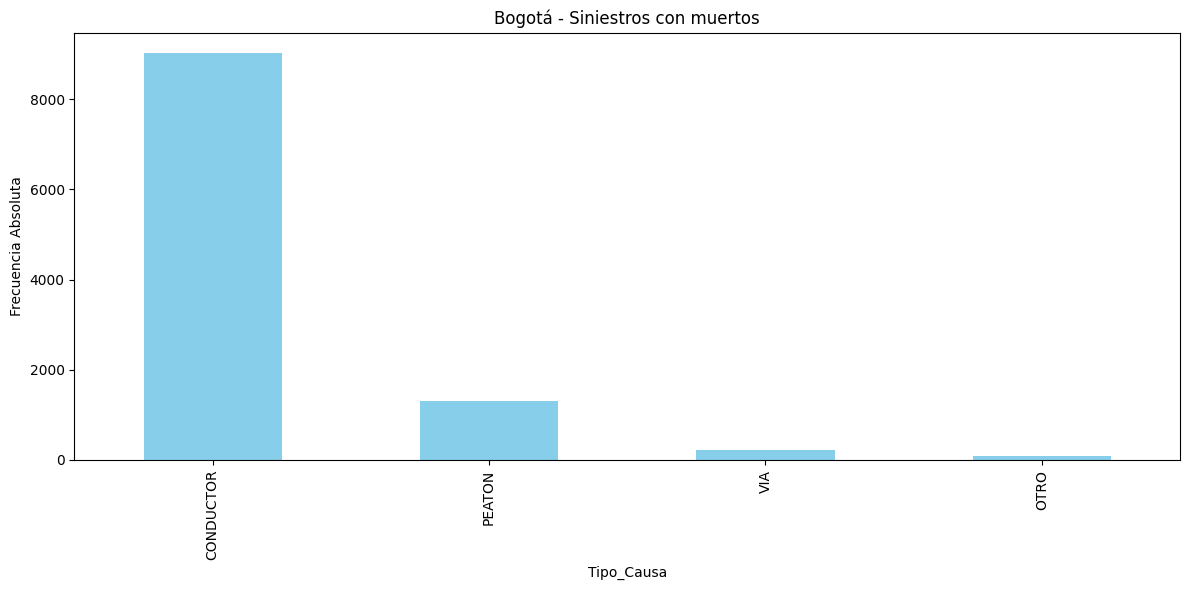

In [100]:
frequencies = siniestros_muertos_df['TIPO_CAUSA_causa'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo_Causa')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá - Siniestros con muertos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **Accidentes con muertos vs. clase de accidente**

Los choques siguen siendo la mayor causa de accidentes cuando hay muertos, pero crece la participación de los atropellamientos a peatones y ciclistas como causantes de muertes en la vía.

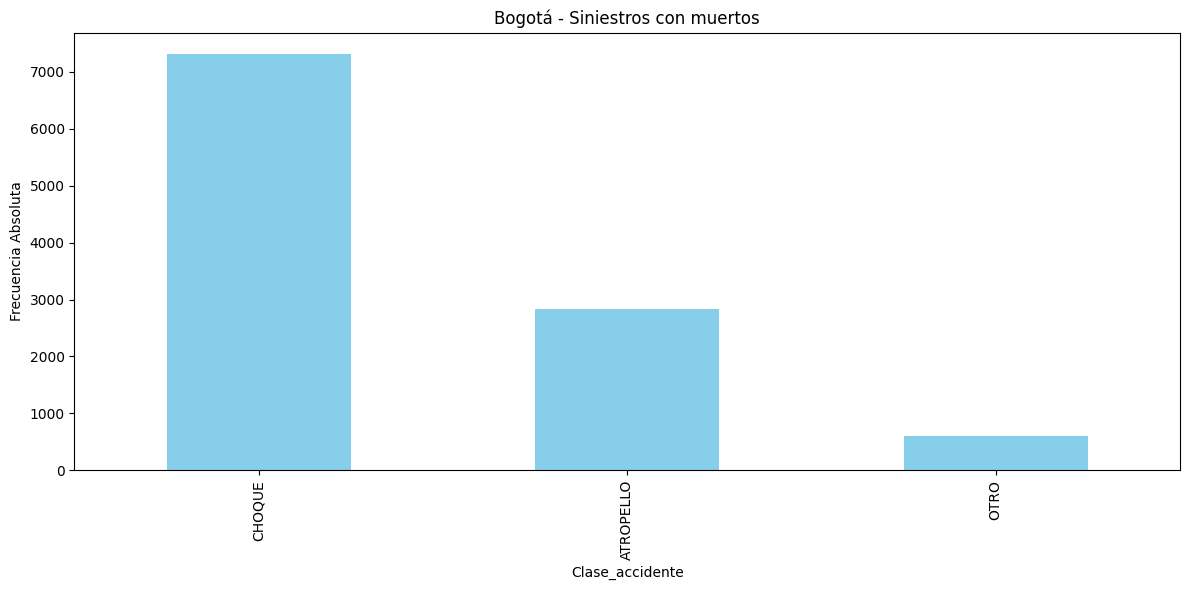

In [101]:
frequencies = siniestros_muertos_df['CLASE_ACC'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Clase_accidente')
plt.ylabel('Frecuencia Absoluta')
plt.title('Bogotá - Siniestros con muertos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# **3. Calidad de los datos**

Se realiza el análisis de calidad de datos utilizando la librería ydata_profiling. Es posible observar que en cuanto a la calidad de los datos se debe destacar que se evidenciaron columnas con más del 70% de campos vacíos/nulos, las cuales fueron descartadas por no ser relevantes para el modelo.

Entre tanto, los atributos que sí son relevantes presentan campos vacios menores al 10%, por lo que se podría proceder a eliminar los registros vacíos en esos casos.

No obstante, el dataset final tiene un 11.2% de datos faltantes en las columnas relativas a causas del accidente, lo cual debemos buscar como solucionar en el trabajo que sigue. Sin embargo, para el modelo de regresión podría ser posible simplemente eliminar estas registroscon datos nulos. Aun así, se conservará un número de registros significativo para el modelo.

Por otra parte, existe cierto número de registros duplicados, los cuales corresponden a un mismo accidente, en el cual han intervenido varios vehículos. Es necesario idear una estrategía para tratar con esta incidencia al momento de establecer el modelo de regresión.

En cuanto a temas de precisión y confiabilidad, se ha observado que los datos han sido recopilados y tratados por la SDM de manera correcta, sin ambiguedades y con fuentes originales de datos que al parecer son coherentes  y precisas.

Por último, es conveniente decir que los datos presentan una buena consistencia y la información de las columnas que se mantuvieron es totalmente relevante y suficiente para implementar los modelos propuestos.



In [27]:
import ydata_profiling

In [28]:
ydata_profiling.ProfileReport(siniestros_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]